In [3]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from ltu_ili_testing import SBI_Fitter
import numpy as np
from unyt import Jy

grid_path = '/home/tharvey/work/output/BPASS_Chab_LogNorm_5_z_12_phot_grid2.hdf5'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 Load grid from path. Create default feature array from photometry. This includes all filters, normalized to the MUV, along with redshift.

In [83]:
fitter = SBI_Fitter.init_from_hdf5('BPASS_Chab_LogNorm_5_z_12_phot_grid2', 
                                grid_path, return_output=False)


In [126]:
depths = 10**((np.array([30] * 20)-8.90)/-2.5) * Jy # 30 AB mag in all 22 filters
scatter_fluxes = 5 


fitter.create_feature_array_from_raw_photometry(depths=depths,
                                                scatter_fluxes=scatter_fluxes,
                                                include_errors_in_feature_array=True,
);

Scattering photometry 5 times for each row
['unc_NIRCam.F070W', 'unc_NIRCam.F090W', 'unc_NIRCam.F115W', 'unc_NIRCam.F140M', 'unc_NIRCam.F150W', 'unc_NIRCam.F162M', 'unc_NIRCam.F182M', 'unc_NIRCam.F200W', 'unc_NIRCam.F210M', 'unc_NIRCam.F250M', 'unc_NIRCam.F277W', 'unc_NIRCam.F300M', 'unc_NIRCam.F335M', 'unc_NIRCam.F356W', 'unc_NIRCam.F360M', 'unc_NIRCam.F410M', 'unc_NIRCam.F430M', 'unc_NIRCam.F444W', 'unc_NIRCam.F460M', 'unc_NIRCam.F480M']
---------------------------------------------
Features: 249995 features over 42 samples
---------------------------------------------
Feature: Min - Max
---------------------------------------------
NIRCam.F070W: -15.058 - 30.618 AB
NIRCam.F090W: -14.425 - 30.618 AB
NIRCam.F115W: -15.348 - 29.911 AB
NIRCam.F140M: -14.933 - 29.911 AB
NIRCam.F150W: -14.663 - 20.897 AB
NIRCam.F162M: -15.700 - 19.636 AB
NIRCam.F182M: -15.578 - 19.497 AB
NIRCam.F200W: -14.899 - 19.507 AB
NIRCam.F210M: -15.119 - 19.351 AB
NIRCam.F250M: -14.933 - 19.316 AB
NIRCam.F277W: -14

In our test dataset, how does mass correlate with the normalization of the photometry?

Text(0.5, 0, 'MUV')

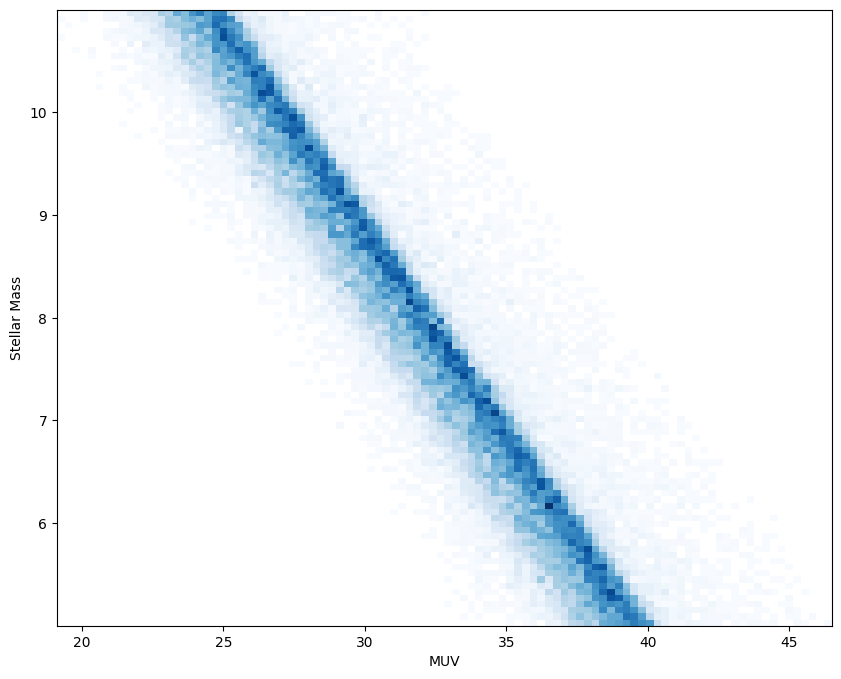

In [16]:
plt.figure(figsize=(10, 8))
plt.hist2d(fitter.feature_array[:, -1], fitter.fitted_parameter_array[:, 0], bins=(100, 100), cmap='Blues', cmin=1)

plt.ylabel('Stellar Mass')
plt.xlabel('MUV')

## Run single SBI model

There are many arguments available here to customize the hyperparameters, model ensemble etc. 

INFO:root:MODEL INFERENCE CLASS: NPE


Splitting dataset with 49999 samples into training and testing sets with 0.80 train fraction.
---------------------------------------------
Prior ranges:
---------------------------------------------
log_mass: 5.00 - 11.00
Pop_II_LogNormal_SFH_5_z_12_logN_4.7_simple/tau_v: 0.00 - 2.00
Pop_II_LogNormal_SFH_5_z_12_logN_4.7_simple/tau: 0.05 - 2.50
Pop_II_LogNormal_SFH_5_z_12_logN_4.7_simple/peak_age: -990.00 - 979.95
Pop_II_LogNormal_SFH_5_z_12_logN_4.7_simple/log10metallicity: -3.00 - 0.30
---------------------------------------------


INFO:root:Training model 1 / 2.


[2025-05-08 22:44:22,739] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 Training neural network. Epochs trained: 415

INFO:root:Training model 2 / 2.


 Training neural network. Epochs trained: 438416 epochs.

INFO:root:It took 1071.91437125206 seconds to train models.
INFO:root:Saving model to /home/tharvey/work/ltu-ili_testing/models/BPASS_Chab_LogNorm_5_z_12_phot_grid2


 Neural network successfully converged after 439 epochs.Time to train model(s): 0:17:52.260320


Drawing 527 posterior samples:   0%|          | 0/527 [00:00<?, ?it/s]

Drawing 473 posterior samples:   0%|          | 0/473 [00:00<?, ?it/s]

INFO:root:Saving single posterior plot to /home/tharvey/work/ltu-ili_testing/models/BPASS_Chab_LogNorm_5_z_12_phot_grid2/plots/BPASS_Chab_LogNorm_5_z_12_phot_grid2_9246_plot_single_posterior.jpg...
  6%|▌         | 557/10000 [00:01<00:32, 289.90it/s]WARNING:root:Only 0.915% proposal samples are
                    accepted. It may take a long time to collect the remaining
                    399 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
 17%|█▋        | 1719/10000 [00:06<00:28, 287.89it/s]WARNING:root:Only 0.674% proposal samples are
                    accepted. It may take a long time to collect the remaining
                    461 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
                    accepted. It may take a long time to collect the remaining
                    464 samples. Consider interrupting (Ctrl-C) and switching 

(NeuralPosteriorEnsemble sampler for potential_fn=<EnsemblePotential>,
 [{'epochs_trained': [0, 416],
   'best_validation_log_prob': [-inf, -4.463332656860351],
   'validation_log_probs': [-11.156840934753419,
    -9.190787551879882,
    -8.738628730773925,
    -8.470506656646728,
    -8.266897365570069,
    -8.082233547210693,
    -7.979101268768311,
    -7.860167999267578,
    -7.775277858734131,
    -7.715001194000244,
    -7.608018787384033,
    -7.497363262176513,
    -7.492117683410645,
    -7.390721172332763,
    -7.388285541534424,
    -7.307450016021728,
    -7.239158050537109,
    -7.216932228088379,
    -7.145428428649902,
    -7.1341740493774415,
    -7.037141441345215,
    -7.049904224395752,
    -6.974621925354004,
    -6.902108180999756,
    -6.9154340934753415,
    -7.10616170501709,
    -6.81009302520752,
    -6.774444133758545,
    -6.744409103393554,
    -6.738487674713134,
    -6.686513153076172,
    -6.6182061882019045,
    -6.732126892089844,
    -6.53614632034301

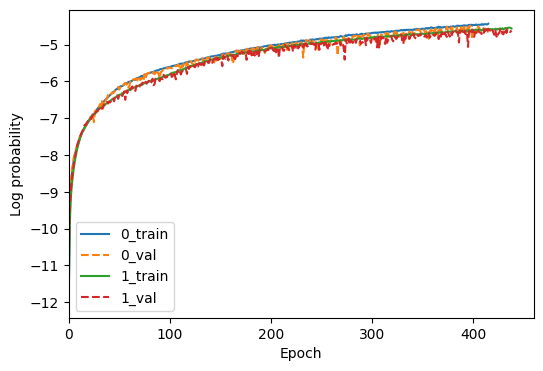

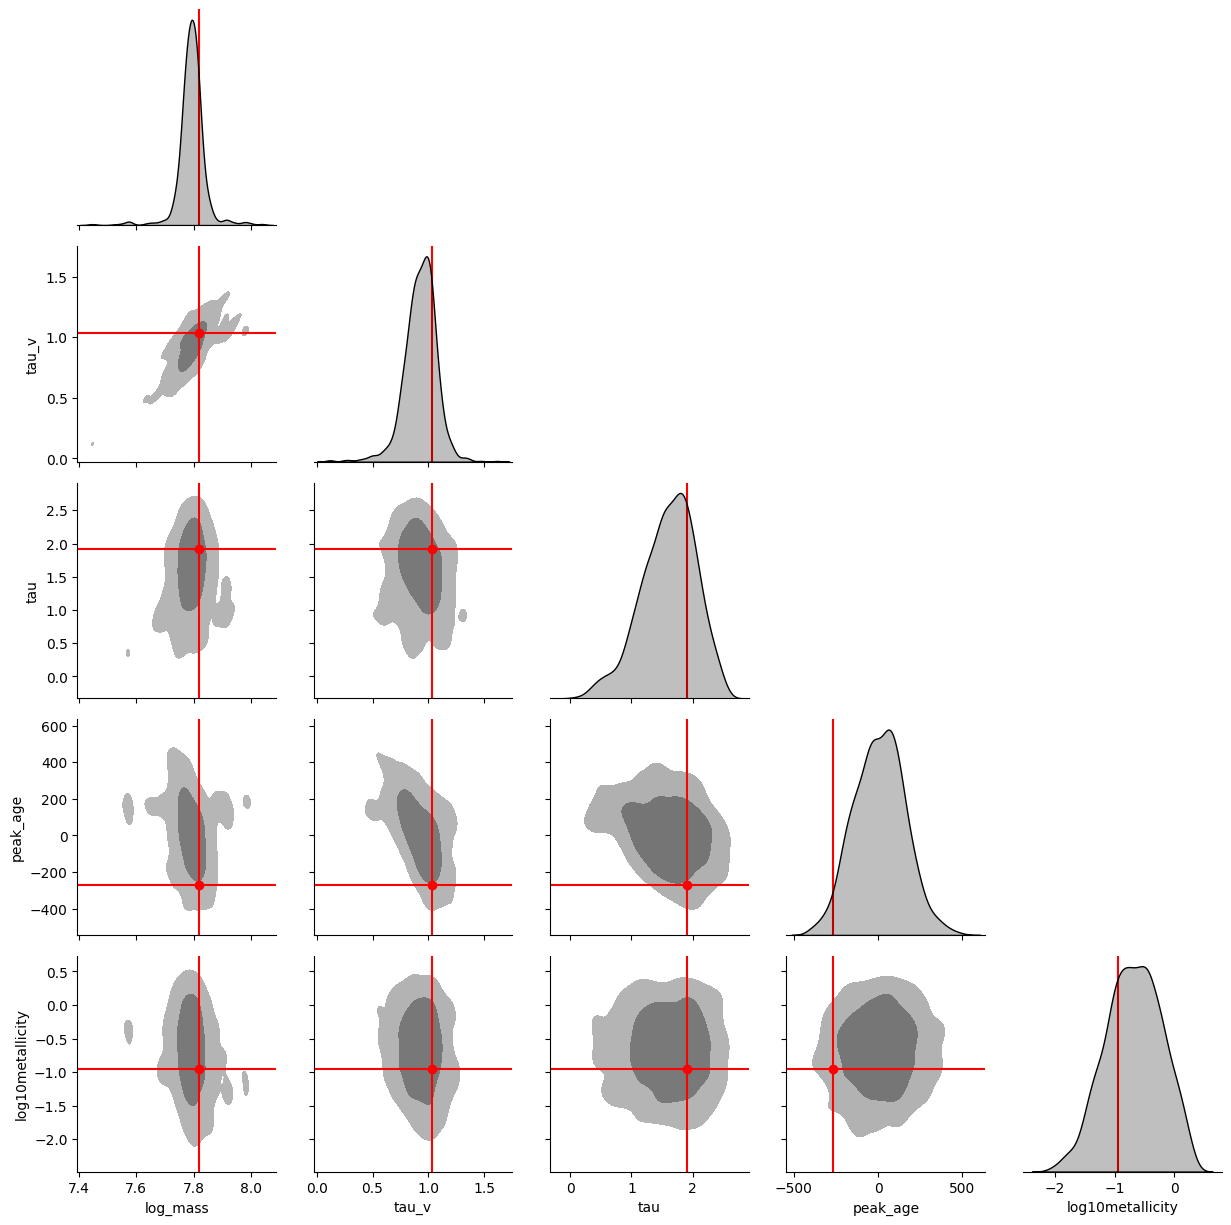

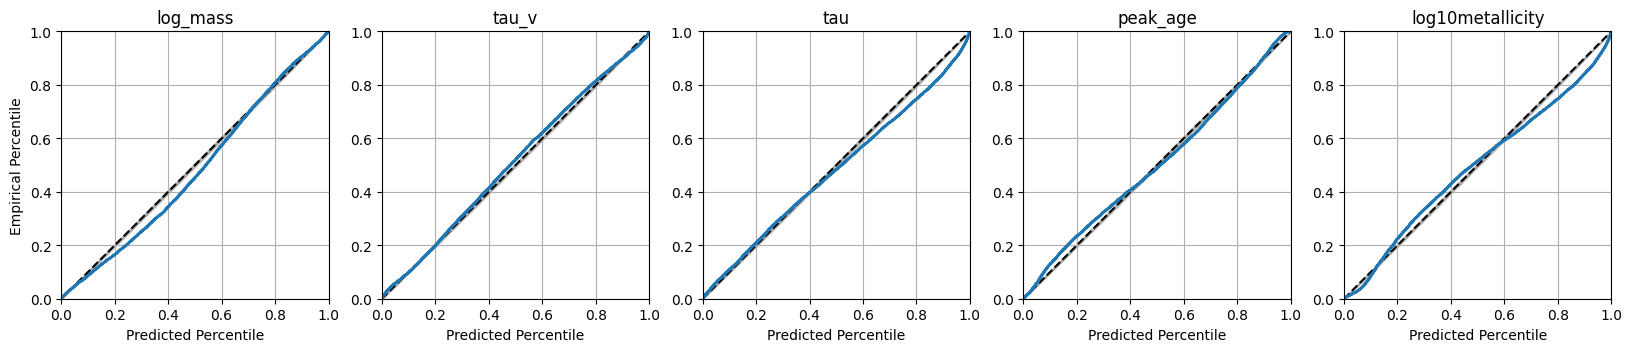

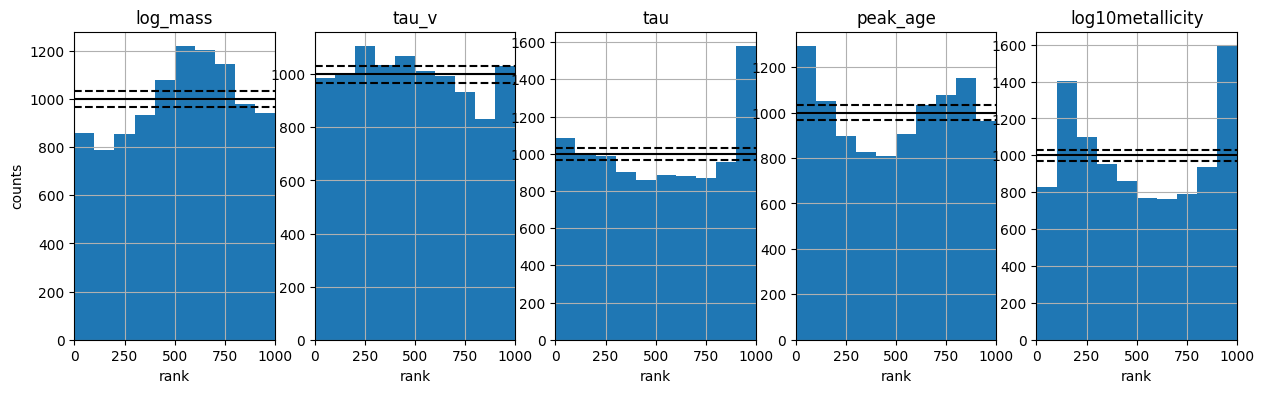

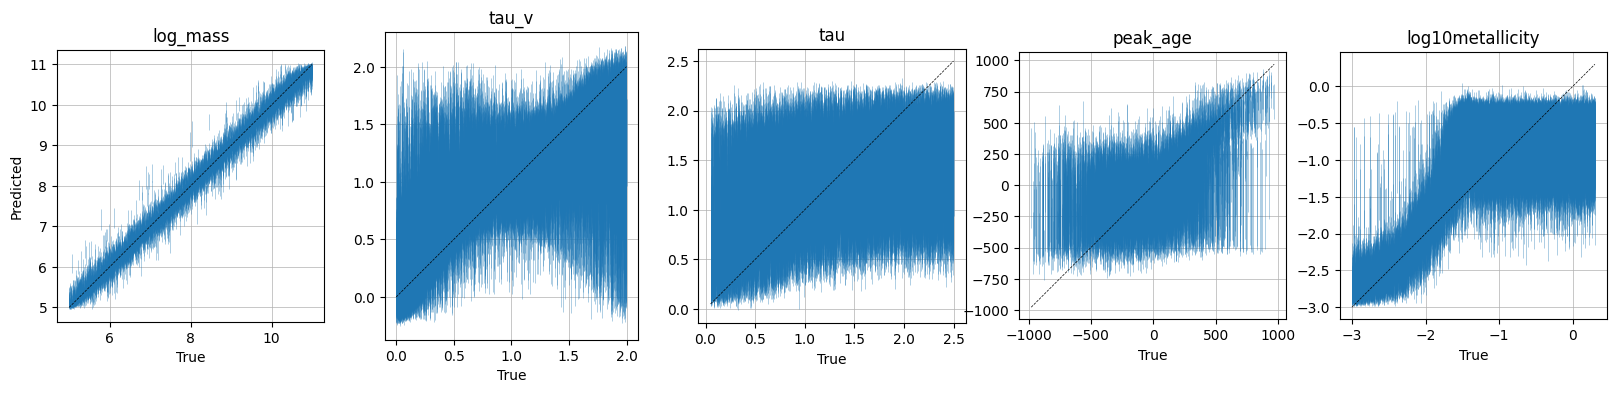

INFO:matplotlib.mathtext:Substituting symbol E from STIXNonUnicode


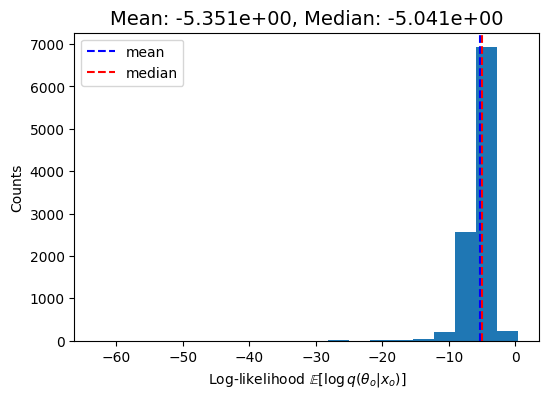

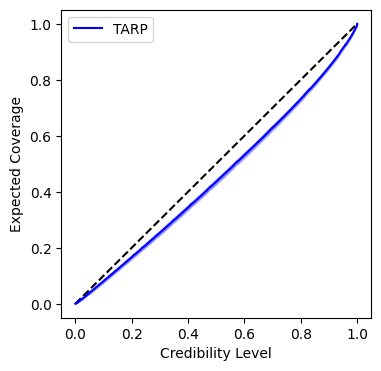

In [20]:
fitter.run_single_sbi(n_nets=2, engine='NPE', stop_after_epochs=20, model_type=['mdn', 'maf'])

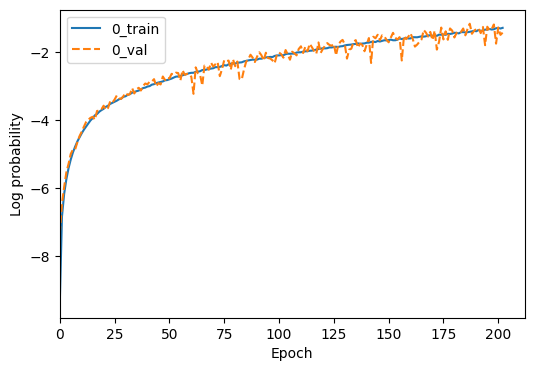

In [39]:
fitter.plot_loss(fitter.stats)

You can load a posterior and stats from the saved model pickle. 

In [3]:
posterior, stats, params = fitter.load_model_from_pkl('/home/tharvey/work/ltu-ili_testing/models/BPASS_Chab_LogNorm_5_z_12_phot_grid2',
                                                set_self=True);

In [11]:
fitter.sample_posterior(sample_method='mcmc')

  1%|          | 10/1670 [00:00<00:36, 45.10it/s]

100%|██████████| 1670/1670 [00:37<00:00, 44.47it/s]


In [17]:
test_metrics = fitter._evaluate_model(
                fitter.posteriors, 
                fitter.feature_array[fitter._test_indices], 
                fitter.fitted_parameter_array[fitter._test_indices],
            )

In [18]:
test_metrics

{'mse': 11719.15285788736,
 'rmse': 108.25503617794121,
 'mae': 35.524208114476295,
 'median_ae': 0.6230378746986389}

saving /home/tharvey/work/ltu-ili_testing/models/BPASS_Chab_LogNorm_5_z_12/plots//param_histogram.png


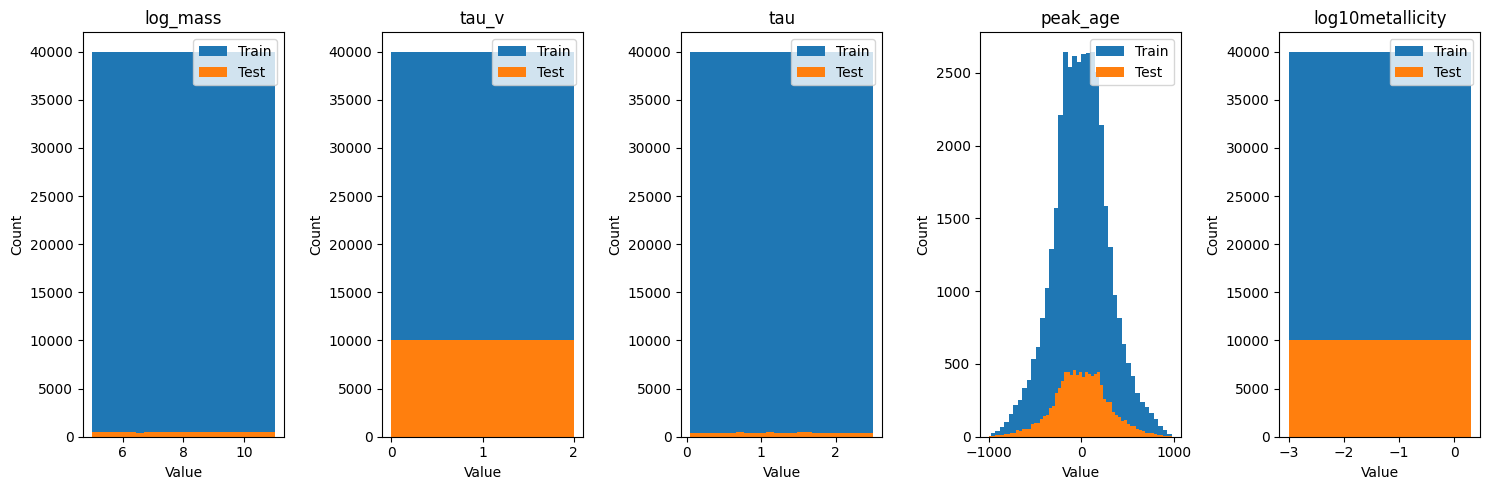

In [48]:
fitter.plot_histogram_parameter_array(seperate_test_train=True);

Let's try a model where we fit for redshift as well

INFO:root:MODEL INFERENCE CLASS: NPE


---------------------------------------------
Features: 49999 features over 21 samples
---------------------------------------------
Feature: Min - Max
---------------------------------------------
NIRCam.F070W: 0.688 - 50.000 AB
NIRCam.F090W: -0.155 - 50.000 AB
NIRCam.F115W: -2.017 - 50.000 AB
NIRCam.F140M: -2.432 - 50.000 AB
NIRCam.F150W: -2.678 - 2.781 AB
NIRCam.F162M: -3.055 - 1.308 AB
NIRCam.F182M: -4.183 - 0.207 AB
NIRCam.F200W: -4.581 - 0.202 AB
NIRCam.F210M: -4.816 - 0.268 AB
NIRCam.F250M: -6.151 - 0.242 AB
NIRCam.F277W: -6.604 - 0.229 AB
NIRCam.F300M: -6.899 - 0.324 AB
NIRCam.F335M: -7.225 - 0.384 AB
NIRCam.F356W: -7.365 - 0.400 AB
NIRCam.F360M: -7.404 - 0.641 AB
NIRCam.F410M: -7.695 - 0.691 AB
NIRCam.F430M: -7.797 - 0.661 AB
NIRCam.F444W: -7.966 - 0.277 AB
NIRCam.F460M: -8.212 - 0.651 AB
NIRCam.F480M: -8.227 - 0.707 AB
norm_mUV_AB: 19.117 - 46.508 AB
---------------------------------------------
Splitting dataset with 49999 samples into training and testing sets with 0.80 tra

INFO:root:Training model 1 / 2.


[2025-05-09 14:54:50,113] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 Training neural network. Epochs trained: 498

INFO:root:Training model 2 / 2.


 Training neural network. Epochs trained: 577499 epochs.

INFO:root:It took 1351.0591645240784 seconds to train models.
INFO:root:Saving model to /home/tharvey/work/ltu-ili_testing/models/BPASS_Chab_LogNorm_5_z_12_phot_grid2_redshift


 Neural network successfully converged after 578 epochs.Time to train model(s): 0:22:31.401994


Drawing 523 posterior samples:   0%|          | 0/523 [00:00<?, ?it/s]

Drawing 477 posterior samples:   0%|          | 0/477 [00:00<?, ?it/s]

INFO:root:Saving single posterior plot to /home/tharvey/work/ltu-ili_testing/models/BPASS_Chab_LogNorm_5_z_12_phot_grid2_redshift/plots/BPASS_Chab_LogNorm_5_z_12_phot_grid2_redshift_20132_plot_single_posterior.jpg...
 24%|██▍       | 2407/10000 [00:08<00:26, 284.68it/s]WARNING:root:Only 0.583% proposal samples are
                    accepted. It may take a long time to collect the remaining
                    408 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
 29%|██▉       | 2930/10000 [00:10<00:24, 284.77it/s]WARNING:root:Only 0.769% proposal samples are
                    accepted. It may take a long time to collect the remaining
                    451 samples. Consider interrupting (Ctrl-C) and switching to
                    `build_posterior(..., sample_with='mcmc')`.
                    accepted. It may take a long time to collect the remaining
                    453 samples. Consider interrupting (Ct

(NeuralPosteriorEnsemble sampler for potential_fn=<EnsemblePotential>,
 [{'epochs_trained': [0, 499],
   'best_validation_log_prob': [-inf, -2.014526885032654],
   'validation_log_probs': [-11.55469915008545,
    -9.773914489746094,
    -9.191541122436524,
    -8.748309059143066,
    -8.384990451812744,
    -8.108938678741454,
    -7.885319713592529,
    -7.675325283050537,
    -7.484864116668701,
    -7.333208862304687,
    -7.17313703918457,
    -7.139647205352783,
    -6.937724746704101,
    -6.78434986114502,
    -6.801563896179199,
    -6.622655220031739,
    -6.527871803283691,
    -6.477711959838867,
    -6.365459644317627,
    -6.280912834167481,
    -6.210168472290039,
    -6.220461620330811,
    -6.056990055084229,
    -6.070103302001953,
    -5.944363143920898,
    -6.028988536834717,
    -5.8254381408691405,
    -5.74616736984253,
    -5.7551849136352535,
    -5.673200984954834,
    -5.566807655334473,
    -5.644585975646972,
    -5.640900127410888,
    -5.481793239593506,


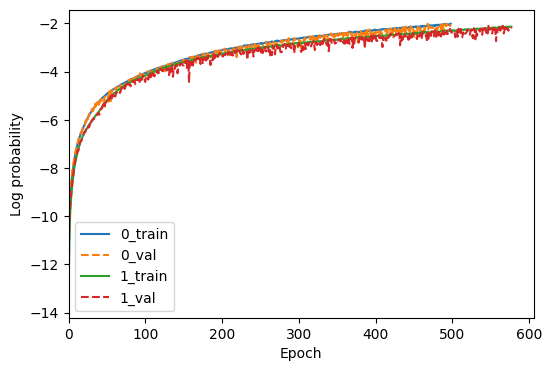

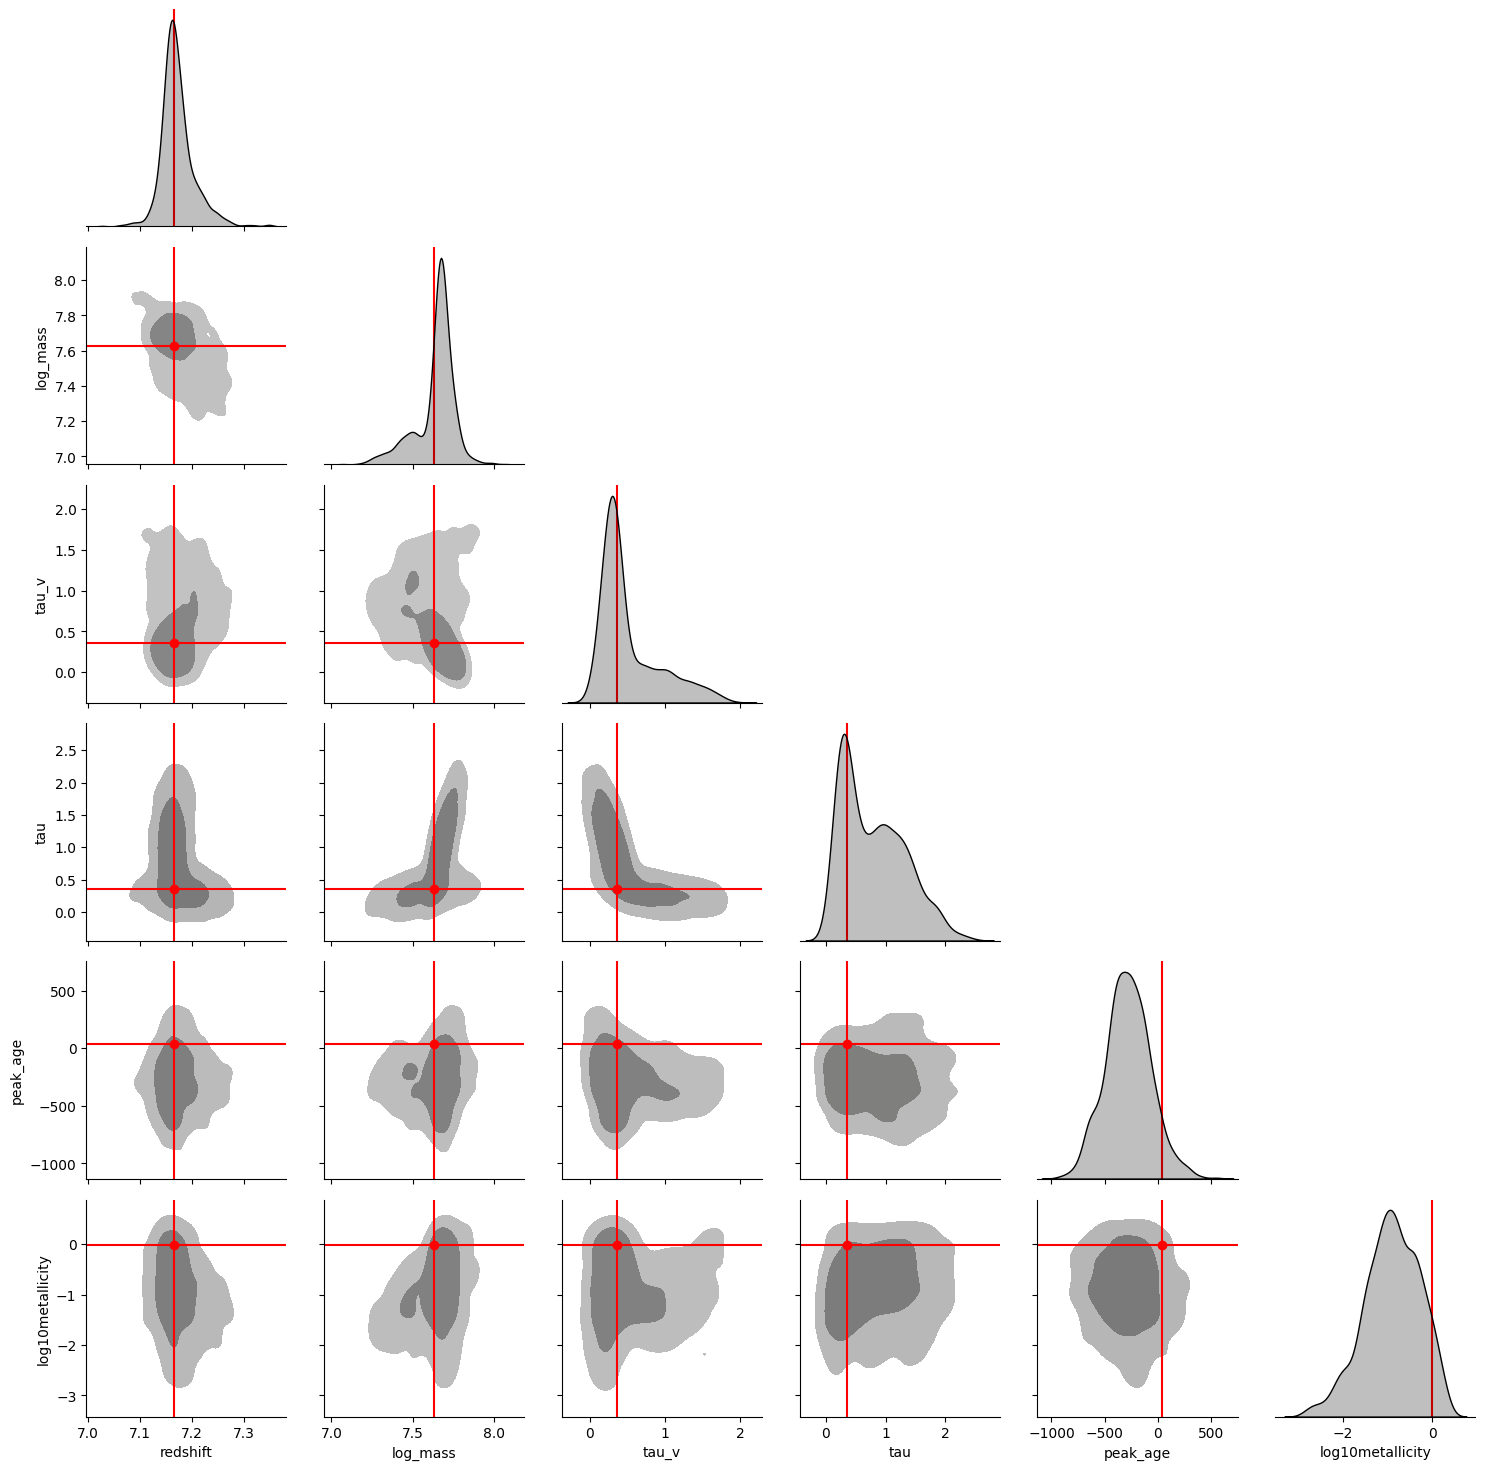

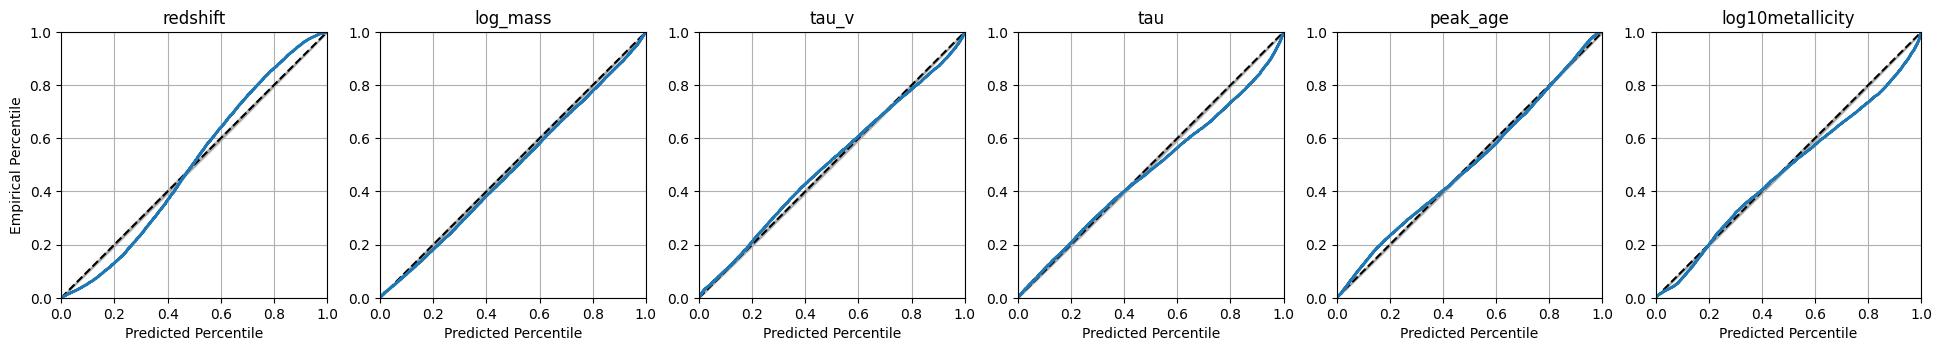

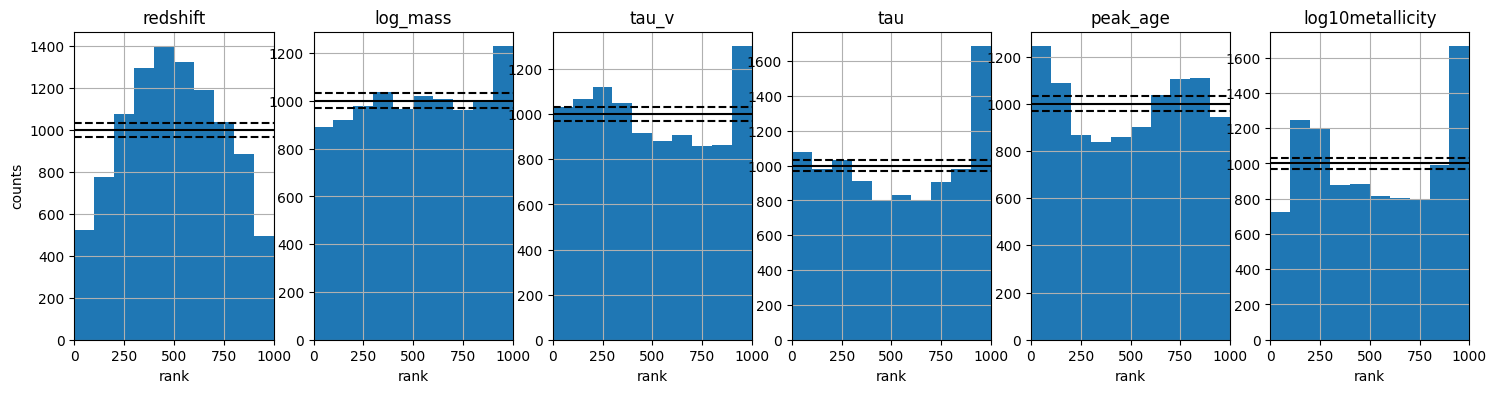

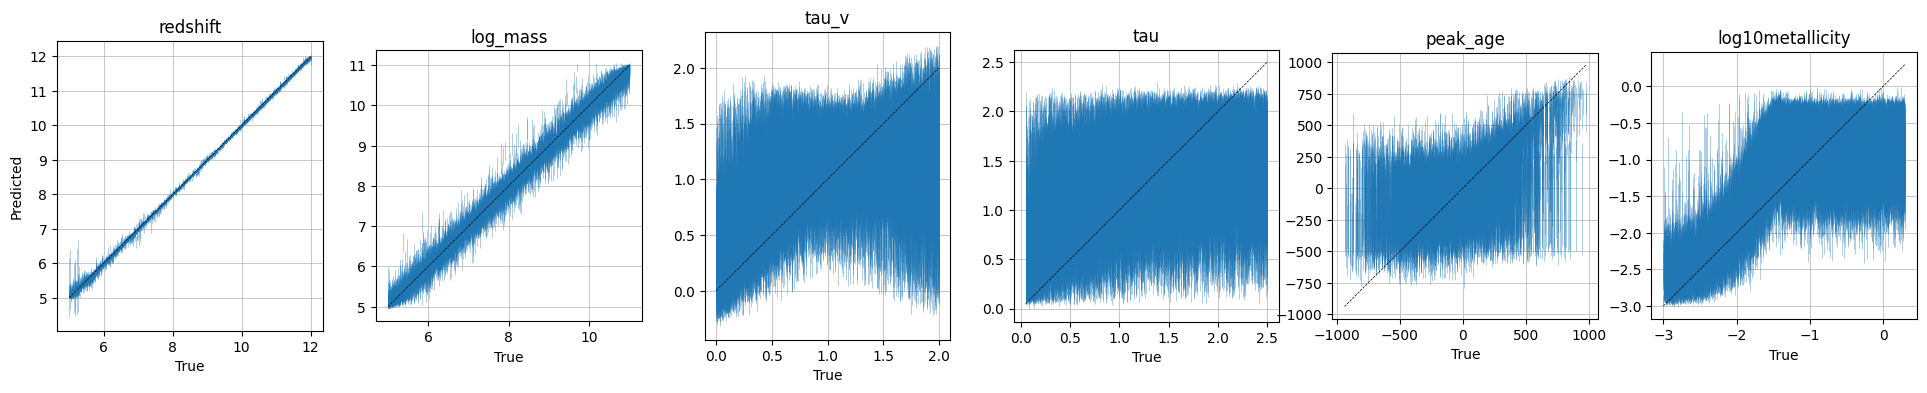

INFO:matplotlib.mathtext:Substituting symbol E from STIXNonUnicode


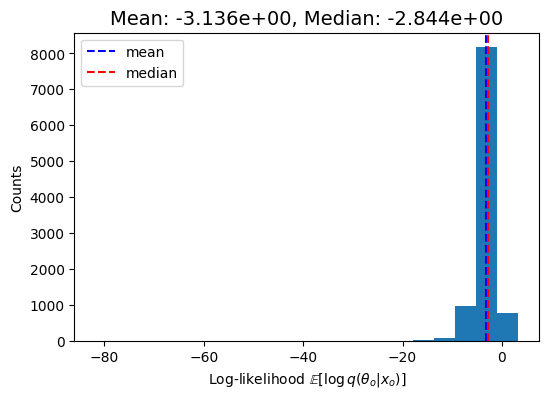

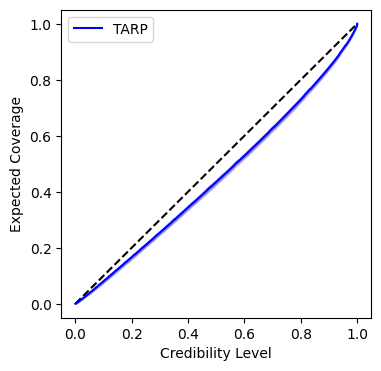

In [4]:
fitter = SBI_Fitter.init_from_hdf5('BPASS_Chab_LogNorm_5_z_12_phot_grid2_redshift', 
                                grid_path, return_output=False)
fitter.create_feature_array_from_raw_photometry(extra_features=[])

fitter.run_single_sbi(n_nets=2, engine='NPE',
                    stop_after_epochs=30, 
                    model_type=['mdn', 'maf'],
                    num_components=8,
                    num_transforms=4)

### Unrelated tests

[[0 0 0 1 1 1 0 0 0]
 [2 0 0 1 1 1 0 0 0]
 [2 0 0 1 1 1 0 0 0]] markers
replacing [[False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]]
replacing [[False False False False False False False False False]
 [False False False False False False False False False]
 [False False False False False False False False False]]
[[1 0 0 0 0 2 2 2 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [3 3 3 0 0 0 0 0 0 0]
 [3 3 3 0 0 0 0 0 0 4]] markers
replacing [[False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]]
replacing [[False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 

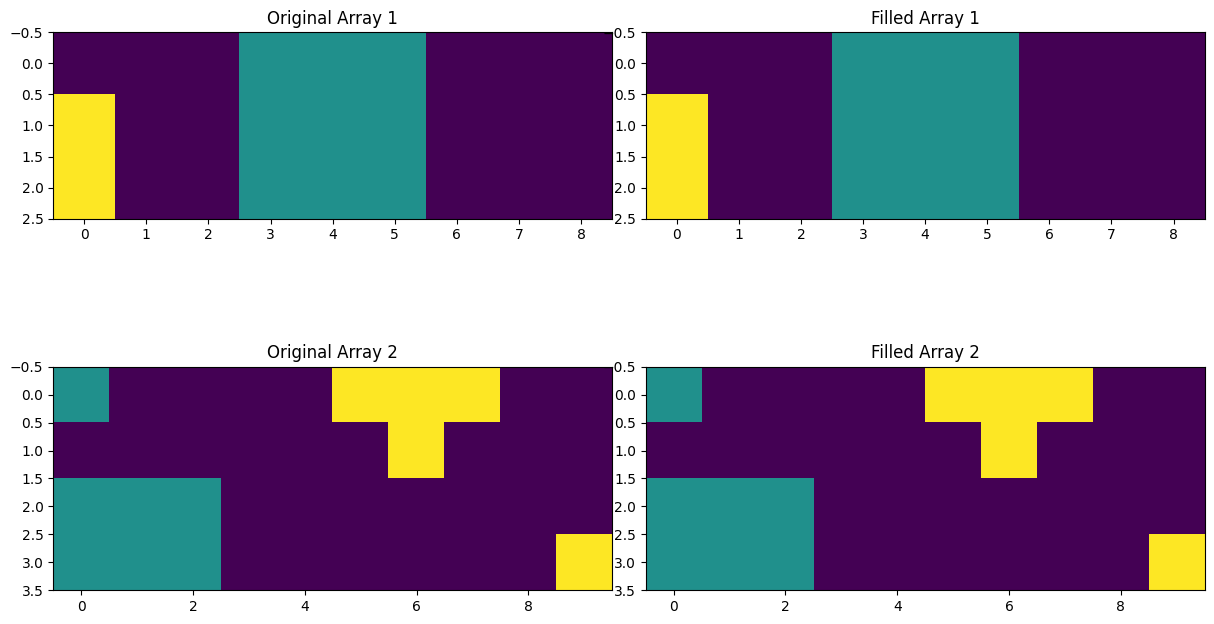

Original Array 1:
[[0 0 0 1 1 1 0 0 0]
 [2 0 0 1 1 1 0 0 0]
 [2 0 0 1 1 1 0 0 0]]

Filled Array 1:
[[0 0 0 1 1 1 0 0 0]
 [2 0 0 1 1 1 0 0 0]
 [2 0 0 1 1 1 0 0 0]]

Original Array 2:
[[1 0 0 0 0 2 2 2 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 2]]

Filled Array 2:
[[1 0 0 0 0 2 2 2 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 2]]


In [8]:
import numpy as np
from scipy import ndimage
from skimage import segmentation
import matplotlib.pyplot as plt

def fill_sparse_array_nearest_value(array):
    """
    Fill zeros in a sparse array based on the nearest non-zero value.
    
    Parameters:
    -----------
    array : 2D numpy array
        The input sparse array with zeros to be filled
        
    Returns:
    --------
    filled_array : 2D numpy array
        Array with zeros replaced by nearest non-zero values
    """
    # Make a copy of the input array
    result = array.copy()
    
    # Create a mask for zero values
    mask = (array == 0)
    
    # Create a mask for non-zero values (sources)
    sources = (array != 0)
    
    if not np.any(sources):
        return array  # Return original if no non-zero values
    
    # Use watershed segmentation to find regions closest to each non-zero value
    markers = ndimage.label(sources)[0]
    print(markers, 'markers')
    labels = segmentation.watershed(-ndimage.distance_transform_edt(mask), markers, mask=mask)
    
    
    # For each zero position, find the closest non-zero value
    for label in range(1, markers.max() + 1):
        # Find the source pixel for this label
        source_y, source_x = np.where(markers == label)
        
        if len(source_y) == 0:
            print('continuing')
            
            
        # Get the value at this source pixel
        source_value = array[source_y[0], source_x[0]]
        
        print('replacing', labels == label)
        # Set all pixels in the corresponding watershed region to this value
        result[labels == label] = source_value
    
    return result

# Example usage
if __name__ == "__main__":
    # Example 1: Simple sparse array
    sparse_array1 = np.array([
        [0, 0, 0, 1, 1, 1, 0, 0, 0],
        [2, 0, 0, 1, 1, 1, 0, 0, 0],
        [2, 0, 0, 1, 1, 1, 0, 0, 0]
    ])
    
    # Example 2: More complex array from the question
    sparse_array2 = np.array([
        [1, 0, 0, 0, 0, 2, 2, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 2]
    ])
    
    # Process both examples
    filled_array1 = fill_sparse_array_nearest_value(sparse_array1)
    filled_array2 = fill_sparse_array_nearest_value(sparse_array2)
    
    # Display the results
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    axes[0, 0].imshow(sparse_array1, cmap='viridis')
    axes[0, 0].set_title('Original Array 1')
    
    axes[0, 1].imshow(filled_array1, cmap='viridis')
    axes[0, 1].set_title('Filled Array 1')
    
    axes[1, 0].imshow(sparse_array2, cmap='viridis')
    axes[1, 0].set_title('Original Array 2')
    
    axes[1, 1].imshow(filled_array2, cmap='viridis')
    axes[1, 1].set_title('Filled Array 2')
    
    plt.tight_layout()
    plt.show()
    
    print("Original Array 1:")
    print(sparse_array1)
    print("\nFilled Array 1:")
    print(filled_array1)
    
    print("\nOriginal Array 2:")
    print(sparse_array2)
    print("\nFilled Array 2:")
    print(filled_array2)

In [21]:
import numpy as np
from scipy import ndimage
from skimage import segmentation
import matplotlib.pyplot as plt
from tqdm import tqdm

def fill_sparse_array_nearest_value(array):
    """
    Fill zeros in a sparse array based on the nearest non-zero value.
    
    Parameters:
    -----------
    array : 2D numpy array
        The input sparse array with zeros to be filled
        
    Returns:
    --------
    filled_array : 2D numpy array
        Array with zeros replaced by nearest non-zero values
    """
    # Make a copy of the input array
    result = array.copy()
    
    # Create a mask for zero values
    mask = (array == 0)
    
    # If there are no zeros to fill, return the original array
    if not np.any(mask):
        return array
    
    # Create a mask for non-zero values (sources)
    sources = (array != 0)
    
    if not np.any(sources):
        return array  # Return original if no non-zero values
    
    # Label the regions of non-zero values
    labeled_sources, num_features = ndimage.label(sources)
    
    # Compute the distance transform from zeros to nearest non-zero
    distances, indices = ndimage.distance_transform_edt(mask, return_distances=True, return_indices=True)
    
    # Create a map from source label to original value
    source_values = {}
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            if array[i, j] != 0:
                source_values[labeled_sources[i, j]] = array[i, j]
    
    # For each zero position, fill with the value of its nearest non-zero neighbor
    for i in tqdm(range(array.shape[0])):
        for j in range(array.shape[1]):
            if array[i, j] == 0:
                # Get coordinates of nearest non-zero pixel
                nearest_i, nearest_j = indices[0][i, j], indices[1][i, j]
                
                # Get the value at this nearest non-zero pixel
                nearest_value = array[nearest_i, nearest_j]
                
                # Set the result pixel to this value
                result[i, j] = nearest_value
    
    return result

# Example usage
if __name__ == "__main__":
    # Example 1: Simple sparse array
    sparse_array1 = np.array([
        [0, 0, 0, 1, 1, 1, 0, 0, 0],
        [2, 0, 0, 1, 1, 1, 0, 0, 0],
        [2, 0, 0, 1, 1, 1, 0, 0, 0]
    ])
    
    # Example 2: More complex array from the question
    sparse_array2 = np.array([
        [1, 0, 0, 0, 0, 2, 2, 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 2]
    ])
    
    # Example 3: Generate a larger demonstration image (50x50)
    np.random.seed(42)  # For reproducibility
    
    # Create a larger empty array
    large_array = np.zeros((10000, 20000))
    
    # Add some random "seed" points with values 1-5
    num_points = 15000
    for _ in range(num_points):
        value = np.random.randint(1, 6)  # Random value between 1 and 5
        x = np.random.randint(0, 50)
        y = np.random.randint(0, 50)
        large_array[y, x] = value
        
        # Occasionally add small clusters
        if np.random.random() < 0.3:
            for _ in range(np.random.randint(2, 5)):
                nx = min(max(x + np.random.randint(-3, 4), 0), 49)
                ny = min(max(y + np.random.randint(-3, 4), 0), 49)
                large_array[ny, nx] = value
    
    # Process all examples
    filled_array1 = fill_sparse_array_nearest_value(sparse_array1)
    filled_array2 = fill_sparse_array_nearest_value(sparse_array2)
    filled_large_array = fill_sparse_array_nearest_value(large_array)

    print('filled')
    
    # Find global min and max values for consistent color scaling
    global_min = min(np.min(sparse_array1), np.min(sparse_array2), np.min(large_array))
    global_max = max(np.max(sparse_array1), np.max(sparse_array2), np.max(large_array))
    
    # Set up a colormap that clearly distinguishes the different values
    cmap = plt.cm.get_cmap('viridis', int(global_max) + 1)
    
    # Display the first two examples with consistent colormaps
    fig1, axes1 = plt.subplots(2, 2, figsize=(12, 8))
    
    im1 = axes1[0, 0].imshow(sparse_array1, cmap=cmap, vmin=global_min, vmax=global_max)
    axes1[0, 0].set_title('Original Array 1')
    fig1.colorbar(im1, ax=axes1[0, 0])
    
    im2 = axes1[0, 1].imshow(filled_array1, cmap=cmap, vmin=global_min, vmax=global_max)
    axes1[0, 1].set_title('Filled Array 1')
    fig1.colorbar(im2, ax=axes1[0, 1])
    
    im3 = axes1[1, 0].imshow(sparse_array2, cmap=cmap, vmin=global_min, vmax=global_max)
    axes1[1, 0].set_title('Original Array 2')
    fig1.colorbar(im3, ax=axes1[1, 0])
    
    im4 = axes1[1, 1].imshow(filled_array2, cmap=cmap, vmin=global_min, vmax=global_max)
    axes1[1, 1].set_title('Filled Array 2')
    fig1.colorbar(im4, ax=axes1[1, 1])
    
    plt.tight_layout()
    
    # Display the large example
    fig2, axes2 = plt.subplots(1, 2, figsize=(16, 8))
    
    im5 = axes2[0].imshow(large_array, cmap=cmap, vmin=global_min, vmax=global_max)
    axes2[0].set_title('Original Large Array (50x50)')
    fig2.colorbar(im5, ax=axes2[0])
    
    im6 = axes2[1].imshow(filled_large_array, cmap=cmap, vmin=global_min, vmax=global_max)
    axes2[1].set_title('Filled Large Array (50x50)')
    fig2.colorbar(im6, ax=axes2[1])
    
    plt.tight_layout()
    plt.show()
    
    print("Original Array 1:")
    print(sparse_array1)
    print("\nFilled Array 1:")
    print(filled_array1)
    
    print("\nOriginal Array 2:")
    print(sparse_array2)
    print("\nFilled Array 2:")
    print(filled_array2)

 33%|███▎      | 3315/10000 [00:26<00:53, 125.93it/s]

Unexpected exception formatting exception. Falling back to standard exception



Traceback (most recent call last):
  File "/home/tharvey/work/ltu-ili_testing/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3667, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_103700/1608171768.py", line 109, in <module>
    filled_large_array = fill_sparse_array_nearest_value(large_array)
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_103700/1608171768.py", line None, in fill_sparse_array_nearest_value
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/tharvey/work/ltu-ili_testing/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2176, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/tharvey/work/ltu-ili_testing/.venv/lib/python3.11/site-packages/IPython/core/ultratb.py", line

100%|██████████| 4000/4000 [00:06<00:00, 597.54it/s]


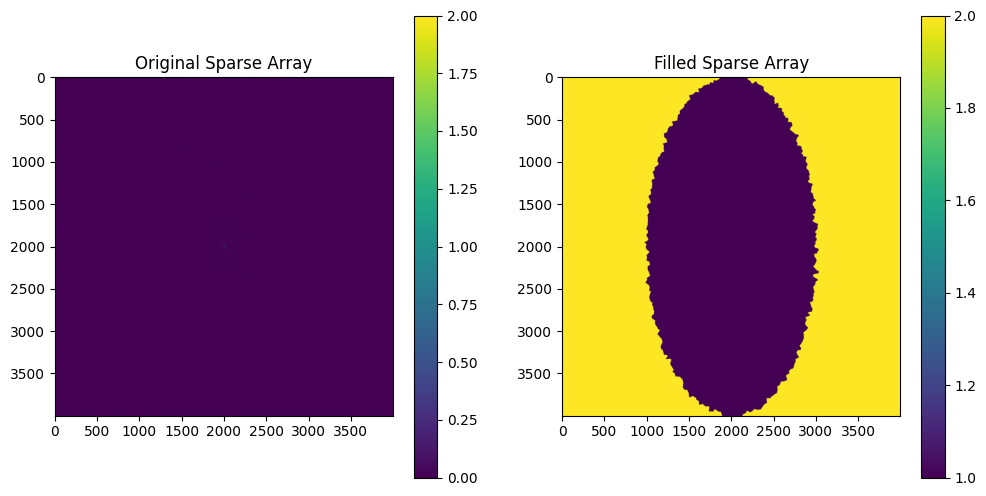

In [22]:
array = np.zeros((4000, 4000))

# In ellipse centered on center with minor and major axes of 1000 and 2000 place 10_000 random 1's

center = array.shape[0] // 2, array.shape[1] // 2
minor_axis = 1000
major_axis = 2000

for _ in range(10000):
    angle = np.random.uniform(0, 2 * np.pi)
    radius = np.random.uniform(0, 1)
    x = int(center[0] + radius * major_axis * np.cos(angle))
    y = int(center[1] + radius * minor_axis * np.sin(angle))
    # Ensure x and y are within bounds
    x = np.clip(x, 0, array.shape[0] - 1)
    y = np.clip(y, 0, array.shape[1] - 1)
    # Set the pixel to zero
    array[x, y] = 1

# Outside the ellipse, place 10_000 random 2's

# Outside the ellipse, place 10_000 random 2's
for _ in range(10000):
    # Generate random points in the entire image
    x = np.random.randint(0, array.shape[0])
    y = np.random.randint(0, array.shape[1])
    
    # Check if the point is outside the ellipse
    # Ellipse equation: (x-h)²/a² + (y-k)²/b² > 1 means outside
    normalized_x = (x - center[0]) / major_axis
    normalized_y = (y - center[1]) / minor_axis
    if normalized_x**2 + normalized_y**2 > 1:
        array[x, y] = 2

        
# Fill the array using the function

filled_array = fill_sparse_array_nearest_value(array)

# Display the original and filled arrays
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
map = axes[0].imshow(array, cmap='viridis')
fig.colorbar(map, ax=axes[0])
axes[0].set_title('Original Sparse Array')
map = axes[1].imshow(filled_array, cmap='viridis')
axes[1].set_title('Filled Sparse Array')
fig.colorbar(map, ax=axes[1])

plt.show()

